# Menganalisis Resiko Gagal Bayar Peminjam


## Daftar Isi <a id='back'></a>

* [Pendahuluan](#2)
	* [Tujuan](#21)
	* [Tahapan](#22)
* [Ikhtisar Data](#3)
	* [Deskripsi Data](#31)
	* [Eksplorasi Data Awal](#32)
* [Pra-pemrosesan Data](#4)
	* [Kolom Education](#41)
	* [Kolom Children](#42)
	* [Kolom Days_employed](#43)
	* [Kolom Dob_years](#44)
	* [Kolom Family_status](#44)
	* [Kolom Gender](#46)
	* [Kolom Income_type](#47)
	* [Penanganan Nilai Duplikat](#48)
	* [Penanganan Nilai Hilang](#49)
		* [Kolom Total_income](#491)
* [Analisis Data dan Temuan serta Hipotesis](#5)
	* [Pengkategorian Data](#51)
		* [Pengkategorian kolom purpose](#511)
		* [Pengkategorian kolom income](#512)
	* [Faktor-faktor yang berpengaruh pada gagal bayar](#52)
		* [Korelasi antara memiliki anak dengan gagal bayar](#521)
		* [Korelasi antara status keluarga dengan gagal bayar](#522)
		* [Korelasi antara kategori pendapatan dengan gagal bayar](#523)
		* [Analisis berdasarkan tujuan kredit](#524)
* [Kesimpulan Umum](#6)

## Pendahuluan <a id='intro'></a>
Dalam dunia keuangan dan analisis data, pemahaman mendalam tentang profil nasabah menjadi hal krusial untuk mengambil keputusan yang tepat. Data nasabah yang terstruktur dan terorganisasi dengan baik dapat memberikan wawasan yang berharga tentang perilaku keuangan mereka, yang pada gilirannya dapat membantu dalam pengambilan keputusan yang lebih cerdas dan strategis.

### Tujuan: 
Proyek ini bertujuan untuk menganalisis data kelayakan pemberian pinjaman kepada nasabah bank. Tujuan utama dari proyek ini adalah untuk melakukan pemahaman mendalam tentang data yang diberikan, mengeksplorasi potensi masalah seperti nilai-nilai yang hilang, duplikasi, dan kesalahan lainnya, serta melakukan analisis terhadap faktor-faktor yang berpotensi mempengaruhi kelayakan pemberian pinjaman. Beberapa tujuan khusus dari proyek ini antara lain:

### Tahapan
Di sini kita akan melakukan analisa dataset credit_scoring_eng.csv.  
Proyek ini terdiri dari tiga tahap:
 1. Ikhtisar Data
 2. Pra-pemrosesan data
 3. Analisa Data


## Ikhtisar Data



In [219]:
# Muat semua library
import pandas as pd


In [220]:
# Muat datanya
try:
    df = pd.read_csv('\datasets\credit_scoring_eng.csv')
except: 
    df = pd.read_csv('credit_scoring_eng.csv')
    
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


### **Deskripsi data**
- `children` - jumlah anak dalam keluarga
- `days_employed` - pengalaman kerja nasabah dalam hari
- `dob_years` - usia nasabah dalam tahun
- `education` - tingkat pendidikan nasabah
- `education_id` - pengidentifikasi untuk tingkat pendidikan nasabah
- `family_status` - status perkawinan
- `family_status_id` - pengidentifikasi untuk status perkawinan nasabah
- `gender` - jenis kelamin nasabah
- `income_type` - jenis pekerjaan
- `debt` - apakah nasabah pernah melakukan gagal bayar pinjaman
- `total_income` - pendapatan bulanan
- `purpose` - tujuan mendapatkan pinjaman



In [221]:
# Mari kita lihat berapa banyak baris dan kolom yang dimiliki oleh dataset kita
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [222]:
df.shape

(21525, 12)

**Kesimpulan**

Terdapat total 21525 baris dengan 12 kolom, tetapi terdapat beberapa nilai yang hilang dan tipe data yang salah pada dataframe

In [223]:
# Mari tampilkan N baris pertama
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family



**Kesimpulan**

Dari sample dataframe yang kita pilih, terdapat beberapa temuan, antara lain:
1. Nilai minus pada days_employed
2. Pada kolom education terdapat nilai duplikat eplisit


### Eksplorasi Data Awal

In [224]:
# Mari kita lihat tabel yang telah difilter dengan nilai yang hilang di kolom pertama yang mengandung data yang hilang
filtered_data = df[df['days_employed'].isna()]
filtered_data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding


In [225]:
filtered_data.shape

(2174, 12)

In [226]:
# Mari kita terapkan beberapa kondisi untuk memfilter data dan melihat jumlah baris dalam tabel yang telah difilter.
filtered_data = df[(df['days_employed'].isna()) & (df['total_income'].isna())]
filtered_data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding


In [227]:
filtered_data.shape

(2174, 12)

In [228]:
#presentasi nilai yang hilang pada kolom 'days_employed' dan 'total_income'
len(filtered_data) / len(df) * 100

10.099883855981417

**Kesimpulan**

Pada dataframe yang dipunya terdapat pola nilai yang hilang, yaitu pada saat kolom 'days_employed' kosong maka kolom 'total_income juga kosong' dan jumlah nilai hilang ini adalah sebesar 10% dari dataframe yang dimiliki

## Pra-pemrosesan Data

### Kolom Education

In [229]:
# Mari kita lihat semua nilai di kolom pendidikan untuk memeriksa ejaan apa yang perlu diperbaiki
df['education'].unique()

array(["bachelor's degree", 'secondary education', 'Secondary Education',
       'SECONDARY EDUCATION', "BACHELOR'S DEGREE", 'some college',
       'primary education', "Bachelor's Degree", 'SOME COLLEGE',
       'Some College', 'PRIMARY EDUCATION', 'Primary Education',
       'Graduate Degree', 'GRADUATE DEGREE', 'graduate degree'],
      dtype=object)

In [230]:
# Perbaiki pencatatan jika diperlukan
df['education'] = df['education'].str.lower()

In [231]:
# Periksa semua nilai di kolom untuk memastikan bahwa kita telah memperbaikinya dengan tepat
df['education'].unique()


array(["bachelor's degree", 'secondary education', 'some college',
       'primary education', 'graduate degree'], dtype=object)

### Kolom Children

In [232]:
# Mari kita lihat distribusi nilai pada kolom `children`
df['children'].value_counts()


children
 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: count, dtype: int64

* Nilai -1 dan 20 sepertinya bukan nilai yang benar pada kolom ini, di tahap selanjutnya akan diganti dengan nilai yang lebih rasional

In [233]:
# memperbaiki nilai pada kolom children
df['children'] = df['children'].replace(-1, 1)
df['children'] = df['children'].replace(20, 2)
df['children'].value_counts()

children
0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: count, dtype: int64

### Kolom days_employed

In [234]:
df.days_employed.describe()

count     19351.000000
mean      63046.497661
std      140827.311974
min      -18388.949901
25%       -2747.423625
50%       -1203.369529
75%        -291.095954
max      401755.400475
Name: days_employed, dtype: float64

In [235]:
# Temukan data yang bermasalah di kolom `days_employed` jika memang terdapat masalah dan hitung persentasenya
employed_minus = df[df['days_employed'] < 0]



print('Jumlah data yang bermasalah:',len(employed_minus))
print('Jumlah persentase data bermasalah:{:.2f}%'.format(len(employed_minus) / len(df) * 100))

Jumlah data yang bermasalah: 15906
Jumlah persentase data bermasalah:73.90%


**Kesimpulan**

1. 73,9% Nilai pada kolom days_employed bernilai minus, yang mana nilai ini tidak sesuai dengan yang seharusnya. maka di tahap selanjutnya akan diubah menjadi nilai positif.
2. Terdapat nilai yang kurang masuk akal, yaitu nilai maksimal yang berada di 401755 (sekitar 1100 Tahun)
3. Terdapat angka dibelakang koma, tidak sesuai dengan deskripsi dari kolom yang seharusnya memuat nilai bulat

In [236]:
# Mengubah menjadi nilai positif
df['days_employed'] = df['days_employed'].apply(abs)


<Axes: >

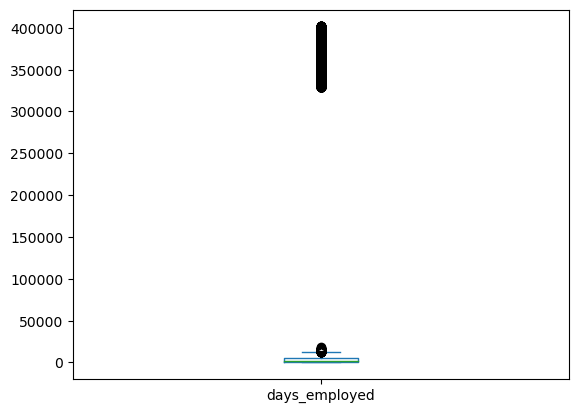

In [237]:
df.days_employed.plot(kind='box')

In [264]:
# Mengubah nilai yang abnormal ke none untuk diisi dengan rata-rata
df.loc[df['days_employed']>300000, 'days_employed'] = None

# Rata-rata nilai employed
employed_avg = df['days_employed'].median()
print("Rata-rata employed: ", employed_avg)

# Mengisi dengan nilai rata-rata
df['days_employed'].fillna(value = employed_avg, inplace=True)


Rata-rata employed:  2353.0


In [239]:
#mengubah menjadi nilai bulat
df['days_employed'] = df['days_employed'].astype('int')

df.days_employed.describe()

count    21525.000000
mean      2352.643020
std       1980.772074
min         24.000000
25%       1025.000000
50%       2353.000000
75%       2518.000000
max      18388.000000
Name: days_employed, dtype: float64

### Kolom dob_years

In [240]:
# Periksa `dob_years` untuk nilai yang mencurigakan dan hitung persentasenya
df['dob_years'].value_counts().reset_index().sort_values(by='dob_years')


,dob_years,count
47,0,101
54,19,14
52,20,51
46,21,111
43,22,183
41,23,254
40,24,264
35,25,357
33,26,408
21,27,493


Terdapat 101 data dengan umur 0 pada dataframe, yang mana ini bukanlah nilai yang benar 

In [241]:
# Mari kita hitung persentasenya
age_0 = df[df['dob_years'] == 0]['dob_years'].count()
age_0 / len(df) * 100

print("Jumlah usia 0:", age_0)
print("Persentase usia 0: {:.2f}%".format(age_0 / len(df) * 100))


Jumlah usia 0: 101
Persentase usia 0: 0.47%


Karena nilai yang bermasalah sangat kecil, maka saya akan menghapus data tersebut

In [242]:
df.query('dob_years > 1', inplace = True)
df['dob_years'].value_counts().reset_index().sort_values(by='dob_years')


,dob_years,count
53,19,14
51,20,51
46,21,111
43,22,183
41,23,254
40,24,264
35,25,357
33,26,408
21,27,493
19,28,503


### Kolom family_status.

In [243]:
# Mari kita lihat nilai untuk kolom ini
df['family_status'].value_counts()


family_status
married              12331
civil partnership     4156
unmarried             2797
divorced              1185
widow / widower        955
Name: count, dtype: int64

In [244]:
df.family_status.isna().sum()

0

Tidak ada nilai bermasalah di familiy_status

### Kolom gender

In [245]:
# Mari kita liat nilai dalam kolom ini
df['gender'].value_counts()

gender
F      14164
M       7259
XNA        1
Name: count, dtype: int64

Terdapat gender 'XNA' yang mana ini tidak diketahui apa artinya, dan karna jumlahnya hanya 1 maka saya akan menghapus data ini

In [246]:
# Atasi nilai-nilai yang bermasalah, jika ada
df = df.drop(df[df['gender'] == 'XNA'].index)

### Kolom income_type

In [247]:
# Mari kita lihat nilai dalam kolom ini
df['income_type'].value_counts()

income_type
employee                       11064
business                        5064
retiree                         3836
civil servant                   1453
unemployed                         2
entrepreneur                       2
student                            1
paternity / maternity leave        1
Name: count, dtype: int64

In [248]:
df.income_type.isna().sum()

0

Tidak ada data yang bermasalah pada kolom ini

### Penanganan Nilai Duplikat

In [249]:
# Periksa duplikat
df.duplicated().sum()

71

In [250]:
# Atasi duplikat, jika ada
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [251]:
# Periksa ukuran dataset yang sekarang kamu miliki setelah manipulasi pertama yang kamu lakukan
df.shape


(21352, 12)

Setelah data dibersihkan yang awalnya kita mempunyai sekitar 21525 data menjadi 21352 data

### Penanganan Nilai yang Hilang

#### Memperbaiki nilai yang hilang di `total_income`

Pada tahap selanjutnya saya akan mengisi nilai yang hilang di total_income berdasarkan usianya, maka saya akan membuat dahulu pengkategorian berdasarkan usia.

In [252]:
# Mari kita tulis sebuah fungsi untuk menghitung kategori usia
def age_grouping(age):
    if age <= 25:
        value = '0-25 y.o'
    elif age > 25 and age <= 50:
        value = '26-50 y.o'
    else:
        value = '> 50 y.0'
    return value
    

In [253]:
# Lakukan pengujian untuk melihat apakah fungsimu bekerja atau tidak
age_grouping(20)

'0-25 y.o'

In [254]:
# Buatlah kolom baru berdasarkan fungsi
df['age_group'] = df['dob_years'].apply(age_grouping)
df.head()


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
0,1,8437,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,26-50 y.o
1,1,4024,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,26-50 y.o
2,0,5623,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,26-50 y.o
3,3,4124,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,26-50 y.o
4,0,2353,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,> 50 y.0


In [255]:
# Periksa bagaimana nilai di dalam kolom baru
df['age_group'].value_counts()


age_group
26-50 y.o    13477
> 50 y.0      6644
0-25 y.o      1231
Name: count, dtype: int64

Berikut tabel yang memuat data tanpa nilai yang hilang:

In [256]:
# Buat tabel tanpa nilai yang hilang dan tampilkan beberapa barisnya untuk memastikan semuanya berjalan dengan baik
df_clean = df.dropna()
df_clean.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
0,1,8437,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,26-50 y.o
1,1,4024,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,26-50 y.o
2,0,5623,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,26-50 y.o
3,3,4124,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,26-50 y.o
4,0,2353,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,> 50 y.0
5,0,926,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house,26-50 y.o
6,0,2879,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions,26-50 y.o
7,0,152,50,secondary education,1,married,0,M,employee,0,21731.829,education,26-50 y.o
8,2,6929,35,bachelor's degree,0,civil partnership,1,F,employee,0,15337.093,having a wedding,26-50 y.o
9,0,2188,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family,26-50 y.o


In [257]:
# Perhatikan nilai rata-rata untuk pendapatan berdasarkan faktor yang telah kamu identifikasi
pd.pivot_table(df_clean, columns = 'age_group', values = 'total_income', aggfunc= 'mean')

age_group,0-25 y.o,26-50 y.o,> 50 y.0
total_income,23447.795802,28124.37258,24704.150073


In [258]:
# Perhatikan nilai median untuk pendapatan berdasarkan faktor yang telah kamu identifikasi
pd.pivot_table(df_clean, columns = 'age_group', values = 'total_income', aggfunc= 'median')

age_group,0-25 y.o,26-50 y.o,> 50 y.0
total_income,21423.8355,24533.012,21310.9445


Pada tahap selanjutnya saya akan menggunakan nilai rata-rata berdasarkan age_group nya untuk mengisi nilai total_income yang hilang

In [259]:
#  Tulis fungsi yang akan kita gunakan untuk mengisi nilai yang hilang
def fillna_mean (dataframe, col_missing, col_group):
    mean = pd.pivot_table(dataframe, columns=col_group, values=col_missing, aggfunc='mean')

    for column in mean.columns:
        dataframe.loc[(df[col_group]==column) & (dataframe[col_missing].isna()), col_missing] = mean[column][0]

    return dataframe
        

In [260]:
# Terapkan fungsi tersebut ke setiap baris
fillna_mean(df, 'total_income', 'age_group')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
0,1,8437,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,26-50 y.o
1,1,4024,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,26-50 y.o
2,0,5623,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,26-50 y.o
3,3,4124,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,26-50 y.o
4,0,2353,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,> 50 y.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,26-50 y.o
21521,0,2353,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,> 50 y.0
21522,1,2113,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,26-50 y.o
21523,3,3112,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,26-50 y.o


In [261]:
# Periksa apakah kita mendapatkan kesalahan
df.total_income.isna().sum()

0

In [262]:
df.total_income.describe()

count     21352.000000
mean      26790.501076
std       15674.872543
min        3306.762000
25%       17223.821250
50%       24704.150073
75%       31321.653000
max      362496.645000
Name: total_income, dtype: float64

In [263]:
# Periksa jumlah entri di kolom
df.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
age_group           0
dtype: int64

Nilai pada kolom total_income sudah benar dan tidak ada nilai yang hilang

## Analisis Data dan Temuan serta Hipotesis

### Pengkategorian data

Dikarenakan banyaknya nilai unik pada kolom purpose dan income, maka dengan ini akan dilakukan pengkategorian data terkait purpose dan income

#### Pengkategorian kolom purpose

In [265]:
# Tampilkan nilai data yang kamu pilih untuk pengkategorian
df.purpose.value_counts()

purpose
wedding ceremony                            786
having a wedding                            764
to have a wedding                           760
real estate transactions                    672
buy commercial real estate                  658
buying property for renting out             649
transactions with commercial real estate    648
housing transactions                        646
purchase of the house                       640
housing                                     640
purchase of the house for my family         637
construction of own property                633
property                                    629
transactions with my real estate            627
building a real estate                      621
building a property                         619
purchase of my own house                    619
buy real estate                             617
housing renovation                          605
buy residential real estate                 603
buying my own car               

Terdapat beberapa kategori yang mewakili 1 data yang sama, dengan ini di tahap selanjutnya akan dijadikan satu kategori yang bersifat umum

In [266]:
# Mari kita tulis sebuah fungsi untuk mengategorikan data berdasarkan topik umum
def categorize_purpose(row):
    if 'car' in row['purpose']:
        return 'car'
    if 'hous' in row['purpose'] or 'prop' in row['purpose'] or 'real est' in row['purpose']:
        return 'real estate'
    if 'wedd' in row['purpose']:
        return 'wedding'
    if 'educ' in row['purpose'] or 'uni' in row['purpose']:
        return 'education'
    





In [270]:
df['category'] = df.apply(categorize_purpose, axis = 1)
df.category.value_counts()

category
real estate    10763
car             4284
education       3995
wedding         2310
Name: count, dtype: int64

setelah dijadikan kategori umum, terdapat 4 kategori umum dari sekian kebutuhan

In [271]:
df.total_income.describe()

count     21352.000000
mean      26790.501076
std       15674.872543
min        3306.762000
25%       17223.821250
50%       24704.150073
75%       31321.653000
max      362496.645000
Name: total_income, dtype: float64

#### Pengkategorian kolom income

In [272]:
# Lihat semua data numerik di kolom yang kamu pilih untuk pengkategorian
def categorize_income(total_income):
    if total_income <= 15000:
        return '<= 15k'
    elif total_income <= 30000:
        return '15-30k'
    elif total_income <= 45000:
        return '30-45k'
    elif total_income <= 60000:
        return '45-60k'
    else:
        return '> 60k'
    
def categorize_income2(total_income):
    if total_income <= 18000:
        return 'low'
    elif total_income > 18000 and total_income <= 32000:
        return 'medium'
    else:
        return 'high'

In [275]:
# Dapatkan kesimpulan statistik untuk kolomnya
df['income_group'] = df['total_income'].apply(categorize_income2)
df['income_group'].value_counts()

income_group
medium    10355
low        5958
high       5039
Name: count, dtype: int64

Setelah dilakukan pengkategorian, saya melakukan 3 pengkategorian dengan pendapatan low, medium dan high berdasarkan persentil dari keseluruhan nilai pada total_income

### Faktor-Faktor yang Berpengaruh pada Gagal Bayar Pinjaman


#### Apakah terdapat korelasi antara memiliki anak dengan probabilitas melakukan gagal bayar pinjaman?

In [317]:
# Periksa data anak dan data gagal bayar pinjaman
children_debt = pd.pivot_table(df, index='children', columns='debt', values='purpose', aggfunc='count')
children_debt['rasio'] = round(children_debt[1] / children_debt[0] *100 , 1).astype(str) +'%'
children_debt

debt,0,1,rasio
children,,,
0,12963.0,1058.0,8.2%
1,4397.0,442.0,10.1%
2,1912.0,202.0,10.6%
3,301.0,27.0,9.0%
4,37.0,4.0,10.8%
5,9.0,NaN,nan%


Dilihat dari ddata diatas, sepertinya ada keterkaitan jumlah anak dengan resiko gagal bayar. semakin banyak jumlah anak maka semakin bertambah juga rasio gagal bayar, tetapi perbedaannya tiddak signifikan

#### Apakah terdapat korelasi antara status keluarga dengan probabilitas melakukan gagal bayar pinjaman?

In [314]:
# Periksa data status keluarga dan data gagal bayar pinjaman
family_status_debt = pd.pivot_table(df, index='family_status', columns='debt', values='purpose', aggfunc='count')
family_status_debt['rasio'] = round(family_status_debt[1] / family_status_debt[0] *100 , 1).astype(str) +'%'
family_status_debt

debt,0,1,rasio
family_status,,,
civil partnership,3743,386,10.3%
divorced,1100,85,7.7%
married,11363,927,8.2%
unmarried,2521,273,10.8%
widow / widower,892,62,7.0%


Dilihat dari data diatas, peminjam dengan status keluarga 'unmarried' dan 'civil partnership' adalah kategori dengan gagal bayar yang tinggi dibandingkan status keluarga lain.

#### Apakah terdapat korelasi antara tingkat pendapatan dengan probabilitas melakukan gagal bayar pinjaman?

In [318]:
# Periksa data tingkat pendapatan dan data gagal bayar pinjaman
income_debt = pd.pivot_table(df, index='income_group', columns='debt', values='purpose', aggfunc='count')
income_debt['rasio'] = round(income_debt[1] / income_debt[0] *100 , 1).astype(str) +'%'
income_debt

debt,0,1,rasio
income_group,,,
high,4682,357,7.6%
low,5483,475,8.7%
medium,9454,901,9.5%


Setelah dianalisa didapati bahwa peminjam dengan kategori pendapatan high memiliki persentasi gagal bayar yang paling rendah dan peminjam dengan dengan kategori medium memiliki persentasi gagal bayar paling tinggi.

#### Analisis Berdasarkan Tujuan Kredit

In [320]:
# Periksa persentase tingkat gagal bayar untuk setiap tujuan kredit dan lakukan penganalisisan
purpose_debt = pd.pivot_table(df, index='category', columns='debt', values='education', aggfunc='count')
purpose_debt['rasio'] = round(purpose_debt[1] / purpose_debt[0] *100 , 1).astype(str) +'%'
purpose_debt

debt,0,1,rasio
category,,,
car,3884,400,10.3%
education,3625,370,10.2%
real estate,9984,779,7.8%
wedding,2126,184,8.7%


Peminjam dengan tujuan car dan education menjadi tujuan gagal bayar tertinggi. Tetapi jika ddilihat keseluruhannya perbedannya tidaklah signifikan

## Kesimpulan Umum

Setelah dilakukan analisa terhadap data yang kita miliki, tidak ditemukan adanya perbedaan yang signifikan antar kategori dengan resiko gagal bayar. Keseluruhan aspek yang kita miliki hanya berbeda 1-3%.

Jika dilihat persentasenya kita dapat menyimpulkan bahwa semakin bertambahnya jumlah anak, semakin bertambah juga resiko gagal bayar dari peminjam. Orang-orang yang melakukan peminjaman untuk pembelian mobil memiliki tingkat gagal bayar yang tinggi.

Setelah didapati hasil analisa tersebut pihak bank diharapkan bisa lebih selektif lagi dalam menentukan pemberian pinjaman terhadap calon nasabah yang masuk ke dalam kategori resiko gagal bayar yang tinggi.